#### Problem Statement

A basic textual analysis to study the n-gram distribution of different languages, and examine a "mystery" text to
determine what language it is in

#### Prepared by: Shantanu Neema (Cummins Inc.)

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import collections
import os

%matplotlib inline

data_folder = os.getcwd() + '/lang_data/'

Follwing functions are to create 3-grams for 6 different types of languages and to plot them with frequency of ngrams encountered in each language

In [2]:
def getText(fpath) :
    myfile = open(fpath,"r")
    read_ = myfile.read()
    return read_.splitlines()

def getNgrams(textlist) :
    Ngram = []
    for i in textlist :   
        lp = "__" + i.lower() + "__"   
        for d in range(0,len(lp)) : 
           Ngram.append(lp[d:d+3])
    return Ngram

def make_ngram_dict(filename, ngrams):
    dict_in = dict.fromkeys(ngrams, 0) 
    lang_ngram = getNgrams(filename)
    lang_dict = dict(Counter(lang_ngram))
    for key in lang_dict.keys():
        dict_in[key] = lang_dict.get(key) 
    dict_out = collections.OrderedDict(sorted(dict_in.items()))
    return dict_out

def plot_hist_ngram(dict_in,label):
    plt.bar(list(range(len(list(dict_in.keys())))), list(dict_in.values()), linewidth=0.25)
    plt.title(label, fontdict=None, loc='center')
    plt.show()

Create n-gram plots for all the languages

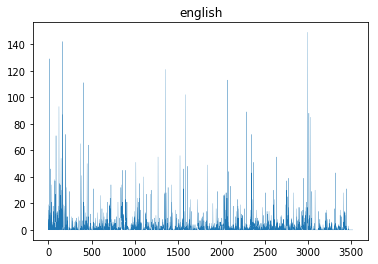

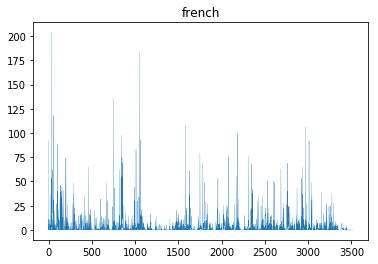

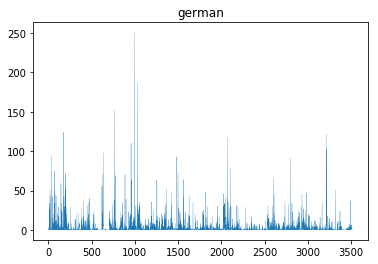

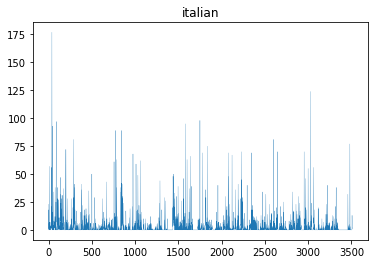

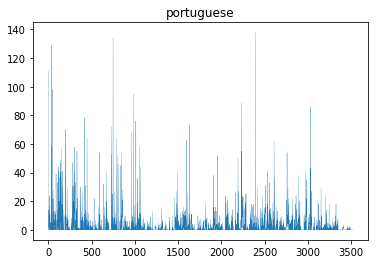

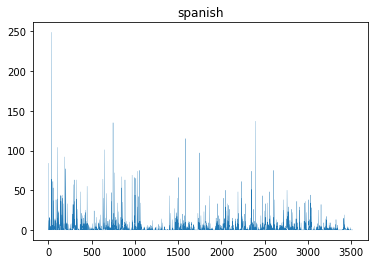

In [3]:
lang_name = ['english', 'french', 'german', 'italian', 'portuguese', 'spanish']
myst_name = 'mystery'

all_ngrams = set()
for name_ in lang_name:
    textlist = getText(data_folder+name_+'.txt')
    ngram_temp = getNgrams(textlist)
    all_ngrams.update(ngram_temp)

for name_ in lang_name:
    textlist = getText(data_folder+name_+'.txt')
    ngram_temp = getNgrams(textlist)
    temp_dict = make_ngram_dict(textlist, all_ngrams)
    plot_hist_ngram(temp_dict,name_)

Create similar plot for mystery language (unknown)

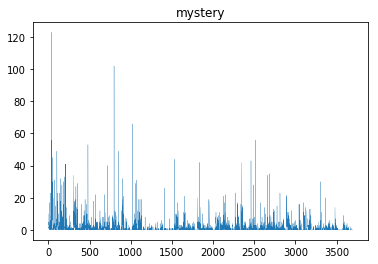

In [4]:
textlist = getText(data_folder+myst_name+'.txt')
ngram_temp = getNgrams(textlist)
temp_dict = make_ngram_dict(textlist, all_ngrams)
plot_hist_ngram(temp_dict,myst_name)

The mystery language looks much similar to **Spanish**